## Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings as wn
wn.filterwarnings('ignore')

## Loading Datasets

In [9]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
df = pd.read_csv(url)
df.sample(5)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
24593,2,1,2.63,1,1,132,132,1,12.8,0.5,0.00,1,9.00
32776,2,1,17.79,2,1,132,68,1,70.0,0.5,6.94,1,3.00
595,2,1,15.98,2,1,132,164,1,70.0,0.5,6.94,1,20.23
11120,2,6,20.15,2,1,132,231,1,70.0,0.5,0.00,1,15.15
35154,2,1,18.62,2,1,132,50,1,70.0,0.5,6.94,1,16.19


**Let's plot and see the correlation of features with the target feature i.e. `tip_amount`**

<Axes: >

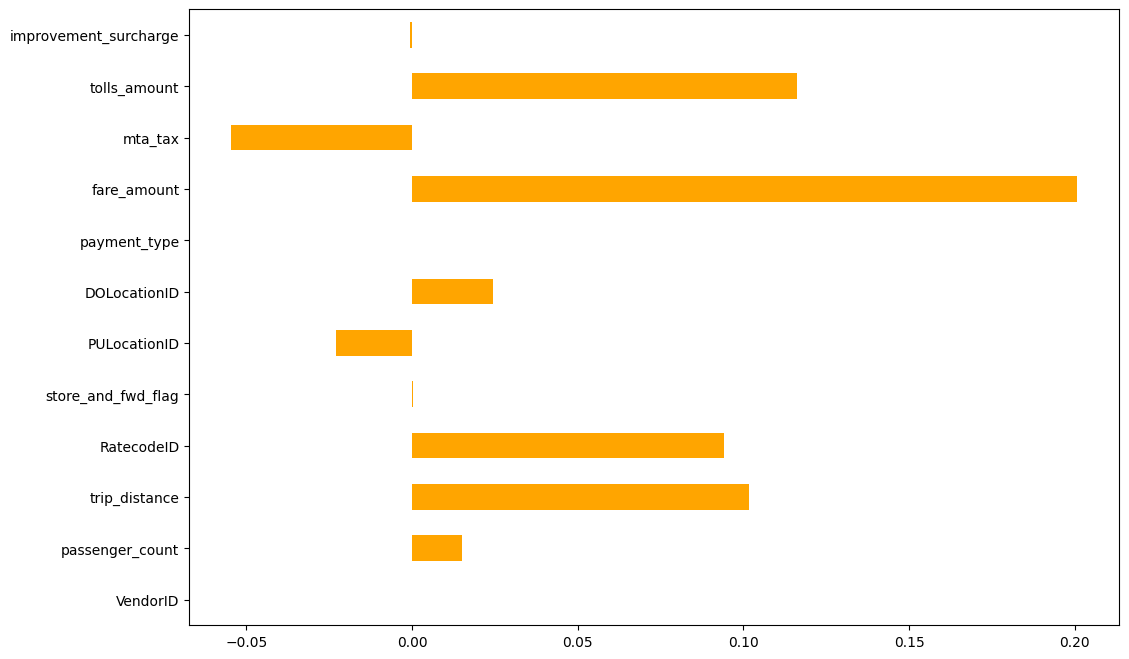

In [18]:
feature_corr = df.corr()['tip_amount'].drop('tip_amount')
feature_corr.plot(kind='barh', figsize=(12,8), color='orange')

## Data Preprocessing

In [27]:
# extract the labels from the dataframe
y = df[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
clean_data = df.drop(columns='tip_amount')

# get the feature matrix used for training
X = clean_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

## Splitting Train/Test Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build a Decision Tree Regressor model with Scikit-Learn##
* Regression Trees are implemented using DecisionTreeRegressor.

* The important parameters of the model are:

* criterion: The function used to measure error, we use 'squared_error'.

* max_depth - The maximum depth the tree is allowed to take; we use 8.

In [79]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor(criterion='squared_error',
                              max_depth=8,
                              random_state=35)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

## Evaluate the Scikit-Learn and Snap ML Decision Tree Regressor Models
To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination. We will also evaluate the Mean Squared Error $(MSE)$ of the regression output with respect to the test set target values. High $R^2$ and low $MSE$ values are expected from a good regression model.


In [40]:
y_pred = model.predict(X_test)

# Evaluate the model with mean_squared_error
print(f'MSE Score: {mean_squared_error(y_test, y_pred):.3f}')

# Calculate r^2 score
r2_score = model.score(X_test, y_test)
print(f'R^2_Score: {r2_score:.3f}')

MSE Score: 25.587
R^2_Score: 0.015


**Finding the most influencing features**

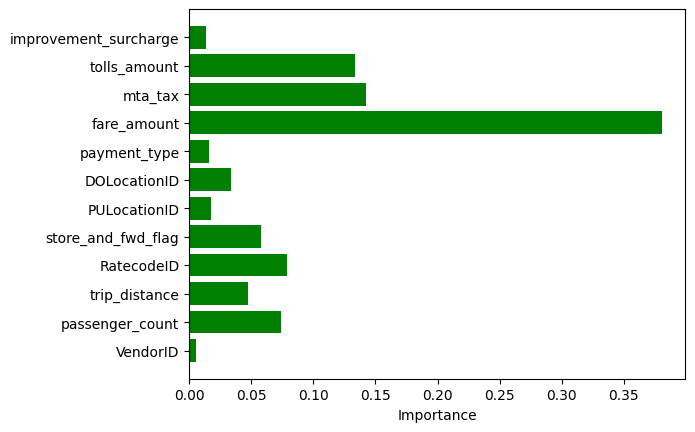

In [65]:
importances = model.feature_importances_
names = df.columns.to_list()
names.remove('tip_amount')
features_importance = pd.DataFrame({'Features':names,
                                    'Importance':importances})
plt.barh(features_importance['Features'], features_importance['Importance'], color='green')
plt.xlabel('Importance')
plt.show()

**Finding Top 3 most important features with relation to correlation**

In [72]:
correlation_features = df.corr()['tip_amount'].drop('tip_amount')
abs(correlation_features).sort_values(ascending=False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

## Visualize the Tree

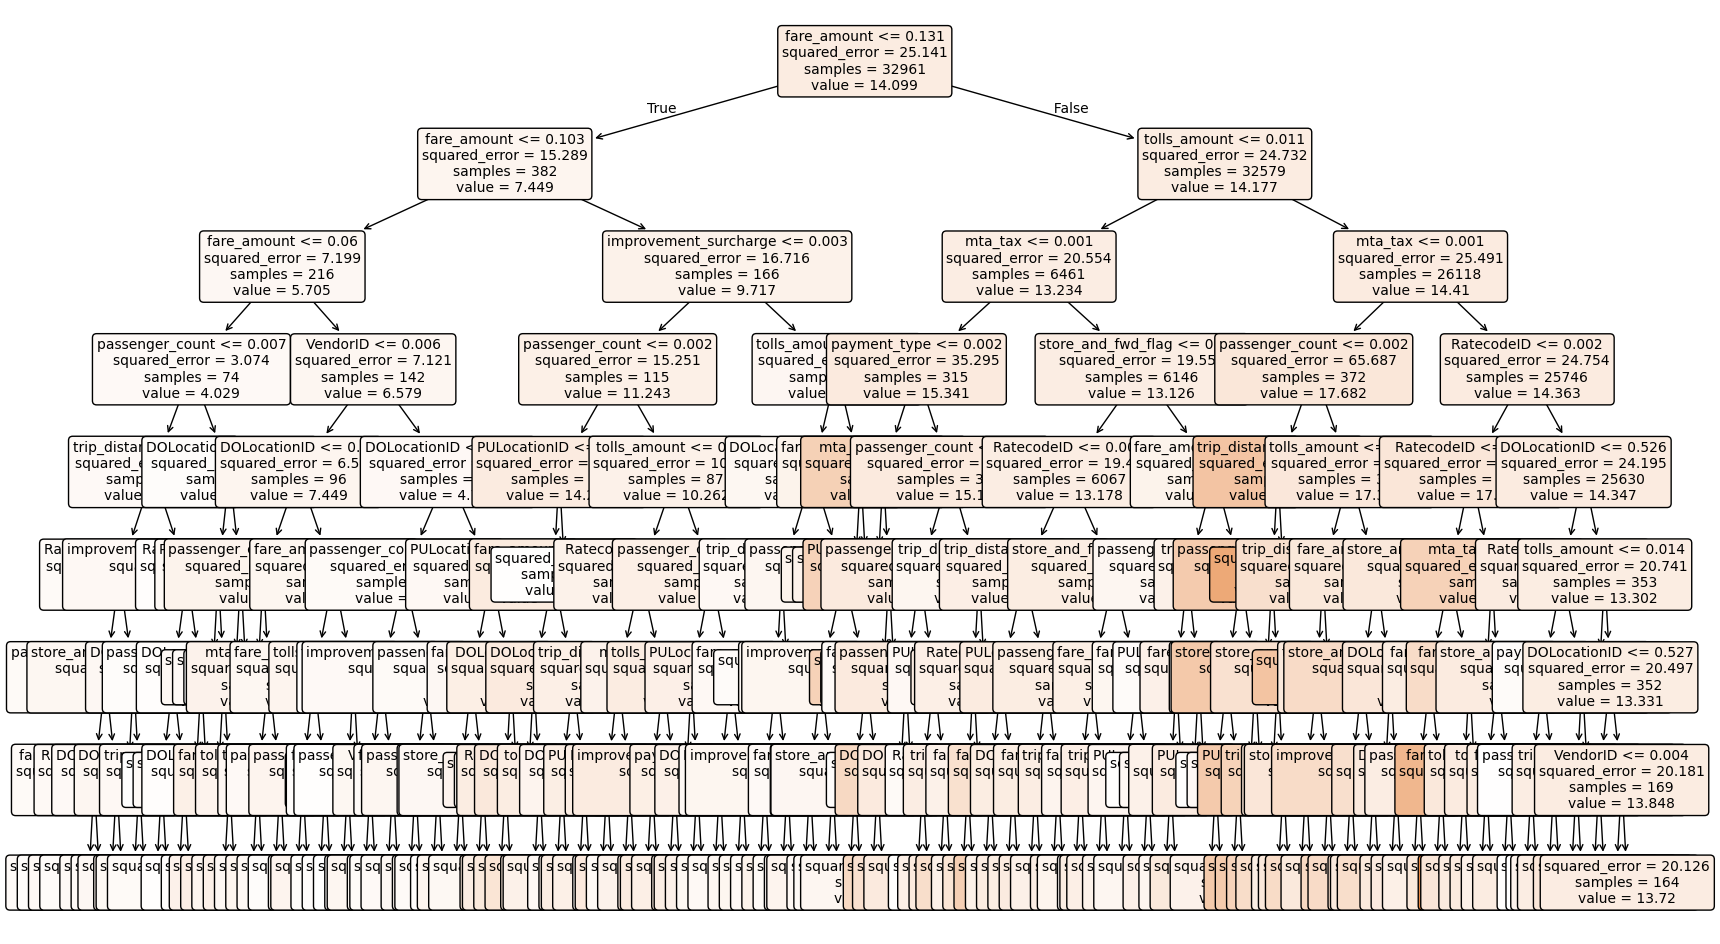

In [84]:
def plot_decision_tree():
    fig = plt.figure(figsize=(20, 12))
    X_data = df.drop(columns='tip_amount')
    plot_tree(model,
          feature_names=X_data.columns,
          rounded=True,
          filled=True,
          fontsize=10)
    plt.show()
plot_decision_tree()

**Let's try removing the features with least correlation**
* The MSE and values does not change significantly, showing that there is minimal affect of these parameters on the final regression output.
* If we decreases max_depth to 4, you will note that the MSE value decreases and $R^2$ value increases, meaning that the choice of `max_depth=4` may be more suited for this dataset.

In [78]:
def remodel_dt(test_size, max_depth):
    least_corr = ['VendorID', 'payment_type', 'store_and_fwd_flag', 'improvement_surcharge']
    df_re = df.drop(columns=least_corr)

    y = df_re['tip_amount'].values.astype('float32')
    X = df_re.drop('tip_amount', axis=1).values

    # Normalize data
    X = normalize(X, norm='l1', copy=False)

    # Splitting Train/Test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model building
    models = DecisionTreeRegressor(criterion='squared_error', max_depth=max_depth, random_state=35)

    models.fit(X_train, y_train)

    # Predicting and evaluating model
    y_preds = models.predict(X_test)

    mse_score = mean_squared_error(y_test, y_preds)
    print(f'MSE Score: {mse_score:.3f}')

    r2_score = models.score(X_test, y_test)
    print(f'R^2 Score: {r2_score:.3f}')
remodel_dt(test_size=0.2, max_depth=4)

MSE Score: 25.337
R^2 Score: 0.024
